### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [3]:
xx, yy, aa, bb, cc = symbols('xx yy aa bb cc')

In [4]:
xdataor = np.array([1, 3, 7, 8, 15])
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
#xdata=xdataor

1.0
15.0
0.14285714285714285
1.1428571428571428


array([-1.        , -0.71428571, -0.14285714,  0.        ,  1.        ])

In [8]:
ydata = np.array([1., 6.4, 8.2, 9.7, 15.3])
yerr = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)) : print ("dimensioni vettori disuguali")

We want to find the parameters $a$ and $b$ of the parabola $y = c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

The minimum condition can be derived expanding $(yy - cc \cdot xx^2 - bb \cdot xx - aa)^2$, and equating the derivatives with respect to $aa$, $bb$, $cc$ to zero. 

In [9]:
s = expand((yy - cc*xx**2 - bb*xx - aa)**2)
s

aa**2 + 2*aa*bb*xx + 2*aa*cc*xx**2 - 2*aa*yy + bb**2*xx**2 + 2*bb*cc*xx**3 - 2*bb*xx*yy + cc**2*xx**4 - 2*cc*xx**2*yy + yy**2

In [10]:
s_aa = diff(s,aa)
s_aa

2*aa + 2*bb*xx + 2*cc*xx**2 - 2*yy

In [11]:
s_bb = diff(s,bb)
s_bb

2*aa*xx + 2*bb*xx**2 + 2*cc*xx**3 - 2*xx*yy

In [12]:
s_cc = diff(s,cc)
s_cc

2*aa*xx**2 + 2*bb*xx**3 + 2*cc*xx**4 - 2*xx**2*yy

$a$, $b$ and $c$ are the solutions of the linear system:
$\begin{bmatrix}
\sum_i \frac{1}{\sigma_i^2} & \sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2}\\
\sum_i \frac{x_i}{\sigma_i^2} & \sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2}\\
\sum_i \frac{x_i^2}{\sigma_i^2} & \sum_i \frac{x_i^3}{\sigma_i^2} & \sum_i \frac{x_i^4}{\sigma_i^2}\\
\end{bmatrix}$
$\begin{bmatrix} a\\b\\c \end{bmatrix}$ = 
$\begin{bmatrix} 
\sum_i \frac{y_i}{\sigma_i^2} \\ \sum_i \frac{x_i y_i}{\sigma_i^2}\\\sum_i \frac{x_i^2 y_i}{\sigma_i^2}
\end{bmatrix}$

In forma matriciale : DA = B quindi A = D^(-1)B

In [13]:
yerrSq = yerr*yerr
sum_one_over_yerrSq = (1./yerrSq).sum()
sum_x_over_yerrSq = (xdata/yerrSq).sum()
sum_x2_over_yerrSq = (xdata*xdata/yerrSq).sum()
sum_x3_over_yerrSq = (xdata*xdata*xdata/yerrSq).sum()
sum_x4_over_yerrSq = (xdata*xdata*xdata*xdata/yerrSq).sum()
sum_y_over_yerrSq = (ydata/yerrSq).sum()
sum_xy_over_yerrSq = (xdata*ydata/yerrSq).sum()
sum_x2y_over_yerrSq = (xdata*xdata*ydata/yerrSq).sum()

In [14]:
matD = np.array([[sum_one_over_yerrSq,sum_x_over_yerrSq,sum_x2_over_yerrSq],
                [sum_x_over_yerrSq,sum_x2_over_yerrSq,sum_x3_over_yerrSq],
                [sum_x2_over_yerrSq,sum_x3_over_yerrSq,sum_x4_over_yerrSq]])
matD_inv = np.linalg.inv(matD)
matD
matD_inv

array([[ 0.11980071,  0.02162113, -0.1305894 ],
       [ 0.02162113,  0.10507891, -0.00712793],
       [-0.1305894 , -0.00712793,  0.25560507]])

Check D^(-1)D = I

In [15]:
np.dot(matD,matD_inv)

array([[ 1.00000000e+00, -5.55111512e-17,  0.00000000e+00],
       [ 2.77555756e-17,  1.00000000e+00, -5.55111512e-17],
       [-2.22044605e-16, -5.55111512e-17,  1.00000000e+00]])

In [16]:
matB = np.array([sum_y_over_yerrSq,sum_xy_over_yerrSq,sum_x2y_over_yerrSq])
matB

array([162.4       ,  34.22857143,  78.93061224])

In [17]:
np.dot(matD_inv,matB)

array([ 9.88819398,  6.54536107, -1.27663194])

In [18]:
a, b, c = np.dot(matD_inv,matB)[0],np.dot(matD_inv,matB)[1],np.dot(matD_inv,matB)[2]
print " a = ", a
print " b = ", b
print " c = ", c

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(" a = ", a)? (<ipython-input-18-b2604d1fd697>, line 2)

Calcolo varianze ed errori sui parametri (Attenzione a cifre significative e unita' di misura!!)

In [19]:
vara, varb, varc= matD_inv[0,0], matD_inv[1,1], matD_inv[2,2]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
print " errore su a = ",erra
print " errore su b = ",errb
print " errore su c = ",errc

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(" errore su a = ",erra)? (<ipython-input-19-b62843df4ca3>, line 5)

Plot, adding extra points for the parabola.

<ErrorbarContainer object of 3 artists>

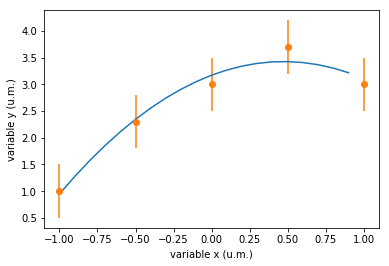

In [16]:
fig, ax = plt.subplots()
thickxdata = np.arange(-1.,1.,0.1)
ax.set_xlabel('variable x (u.m.)')
ax.set_ylabel('variable y (u.m.)')
# ax.set_xlim(0, 5); ay.set_xlim(0, 5) PEr cambiare range plot
plt.plot(thickxdata,c*thickxdata*thickxdata+b*thickxdata+a)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [20]:
scarto1 = (ydata-a-b*xdata-c*xdata*xdata)/yerr
scarto2 = (ydata-a-b*xdata-c*xdata*xdata)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-3)).sum()
errst = np.sqrt(errstSq)
print " Chi^2 = ",chi2
print " errore standard della stima = ",errst

 Chi^2 =  0.484571428571429
 errore standard della stima =  0.2461126339126633


array([ 0.10285714, -0.09142857, -0.34285714,  0.54857143, -0.21714286])

In [18]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
yatteso =a+b*xdata+c*xdata*xdata
scarto3=yatteso-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print "coefficiente determinazione = ",detercoeff

coefficiente determinazione =  0.9854026868387266
